# Project notebook

The imports for the project

In [1]:
import pandas
import matplotlib.pyplot as plt
import math
import os

import data_dl
import data_reorg
import data_preprocessing

Code to automatically download and organise data. **WARNING**: Can take a while

- data_dl.py downloads the data CSVs from their respective websites
- data_reorg.py reorganises the data into CSVs by station, instead of by quarter.

Fairly unintersting code

In [2]:
data_preprocessing.dublin_weather()
data_preprocessing.dublin_bss()

data_preprocessing.organise_by_station()

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 3329.61it/s]

Dublin weather data already exists

Finished downloading Dublin BSS data
Starting dublinbikes reorganisation

Finished dublinbikes reorganisation


Function to convert the time in the TIME field to an int representing when in the day it is. And a function to extract the date only from the TIME field.

average_day() takes the station number to plot, and then calculates the average population of the station over the course of a day

In [3]:
def convert_time(x):
    """ 
    Converts TIME field in the CSV to an integer representing
    what time of day it is (in number of 5min increments) from 0 to 287
    eg
    - 00:00 -> 0
    - 00:10 -> 2
    - 02:20 -> 28
    etc
    """
    a = x.split(' ')
    a = a[1].split(':')

    ans = math.floor((int(a[0]) * 12) + (int(a[1]) / 5))

    return ans

def extract_date(x):
    return x.split(' ')[0]

def average_day(station):
    """
    Plots the average population of a station over time 
    (so the average of a station at a certain time of day)
    """
    filename = './datasets/bss/dublin/reorg/station_' + str(station) +'.csv'
    
    if not os.path.exists(filename):
        print("Station file " + str(station) + " does not exist")
        return
    
    dataset = pandas.read_csv(filename, usecols=['TIME', 'AVAILABLE BIKES'])
    dataset['INT_TIME'] = dataset['TIME'].apply(lambda x: convert_time(x))
    dataset['DATE'] = dataset['TIME'].apply(lambda x: extract_date(x))
    
    #Calculating average pop at all times during the day

    time_total = {}
    time_count = {}

    times = dataset['INT_TIME'].unique()
    times.sort()

    # fill dict
    for time in times:
        time_total[time] = 0
        time_count[time] = 0

    for i, row in dataset.iterrows():
        time_total[row['INT_TIME']] = time_total[row['INT_TIME']] + row['AVAILABLE BIKES']
        time_count[row['INT_TIME']] = time_count[row['INT_TIME']] + 1
        
    averages = [x/y for x, y in zip(time_total.values(), time_count.values())]

    plt.plot(times, averages, label=str(station))

Calls average_day() on a station CSV and opens the graph

NameError: name 'times' is not defined

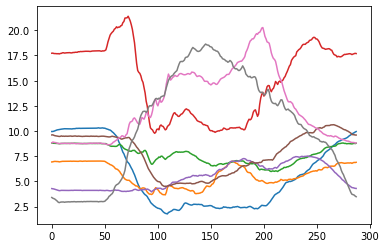

In [5]:
###This code plots ALL stations on the same graph
# stations = pandas.read_csv("./datasets/bss/dublin/dublin.csv", usecols=["Number"])
# for station in stations['Number']:
#     average_day(station)
    

for x in range(2, 10):
    print(x)
    average_day(x)

plt.plot(times, averages)
plt.xlabel('Time')
plt.ylabel('Available bikes')

x=[0, 48, 96, 144, 192, 240, 288]
lables = ['00:00', '04:00', '08:00', '12:00','16:00', '20:00','24:00'] 
plt.xticks(range(len(lables)), lables)
    
plt.show()